In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [7]:
df=pd.read_csv(r"creditcard.csv")

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
x=df.drop(columns='Class')
y=df['Class']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
ss=StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

C:\AnaconaC\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [15]:
sm = SMOTE(random_state=42)
x_train_res,y_train_res = sm.fit_resample(x_train, y_train)

In [16]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(x_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
y_pred = lr.predict(x_test)

In [22]:
accuracy_score(y_test, y_pred)

0.9972788876795057

In [23]:
confusion_matrix(y_test, y_pred)

array([[56807,    57],
       [   98,     0]], dtype=int64)

In [24]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56864\n           1       0.00      0.00      0.00        98\n\n    accuracy                           1.00     56962\n   macro avg       0.50      0.50      0.50     56962\nweighted avg       1.00      1.00      1.00     56962\n'

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

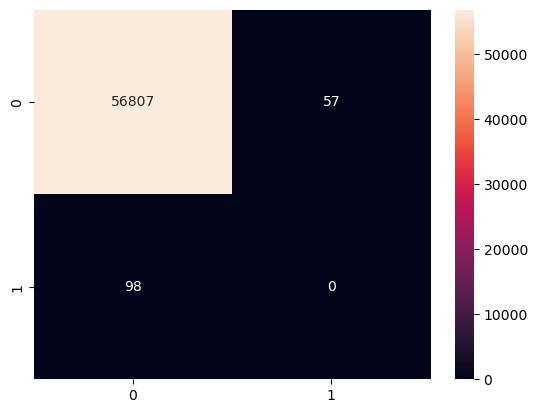

In [27]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show

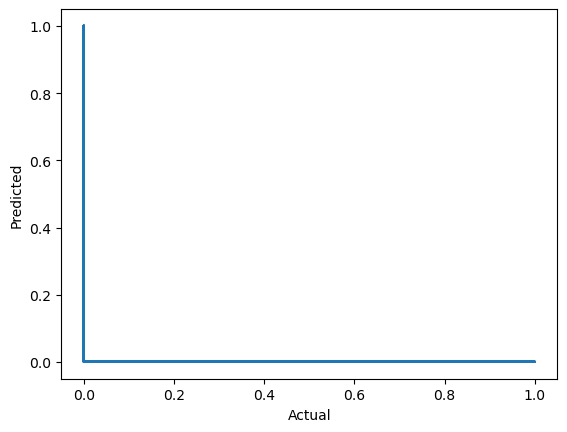

In [31]:
plt.plot(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()